# Highlighting Labels for Evaluation
- Author(s): Abhishek Varshney and Akshat Gurbuxani 
- Description: This code is used to highlight/paint the labels on the image for visualization purposes

# Importing Libraries

In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Configurations

In [2]:
main_path = "Dataset/neurite-oasis.2d.v1.0/"   # Path to Neurite OASIS Data
file_name = "slice_seg24.nii.gz"
labels_total = 24

# Labels and Categories

In [3]:
label_category = {}
# Open the text file
file_path = 'seg24_labels.txt'  # Specify the path to your text file
with open(file_path, 'r') as file:
    # Read all lines in the file
    lines = file.readlines()
    
    # Process each line
    for line in lines[3:]:
        # Split the line into individual values based on spaces
        values = line.split()
        # Process the values as needed
        label, category = values[0], values[1]
        label_category[int(label)] = category

# Read Brain MRI Image

In [4]:
file_path = main_path + "OASIS_OAS1_0004_MR1/" + file_name

img = nib.load(file_path)

data_array = img.get_fdata()
data_array = data_array.astype(np.int32)

print("Shape of the data array:", data_array.shape)
print("Data type of the data array:", data_array.dtype)

Shape of the data array: (160, 192, 1)
Data type of the data array: int32


# Highlight certain labels in the image

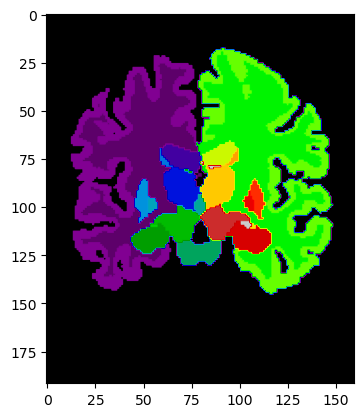

In [5]:
img = np.squeeze(data_array)
img = np.rot90(img, k = -1)
plt.imshow(img, cmap = "nipy_spectral")

In [6]:
def highlight_labels_in_img(img, label_ids_to_keep, colors, fig_name):
    # Create a 3D array representing an RGB image
    rgb_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    # Create a mask to identify values not in the specified list
    mask = np.logical_not(np.isin(img, label_ids_to_keep))

    # Set values not in the specified list to zero
    img[mask] = 0

    # Create a 3D array representing an RGB image
    rgb_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)


    for i, label_to_find in enumerate(label_ids_to_keep):

        # Define the RGB color
        color_rgb = colors[i]

        # Find indices where the 2D array elements have the specified value
        indices = np.where(img == label_to_find)

        # Assign the RGB color to the corresponding indices
        rgb_image[indices[0], indices[1]] = color_rgb
    
    # Define the labels for legends
    labels = [label_category[label_id] for label_id in label_ids_to_keep]

    plt.imshow(rgb_image)

    # Add custom legend
    for i, label in enumerate(labels):
        plt.plot([], [], color=tuple(np.array(colors[i])/255), label=f'{label}', marker='o', linestyle = '')

    # Remove ticks on both axes
    plt.xticks([])
    plt.yticks([])

    plt.legend(loc='lower center', bbox_to_anchor=(0.6, -0.01), ncol=1)
    
    # Save plot as PDF
    plt.savefig(fig_name, dpi=300)
    
    plt.tight_layout()
    plt.show()

In [7]:
# Define the values to keep
label_ids_to_keep = [1, 8, 10, 11]

# Create a colormap with four colors
colors = [[0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 0]]

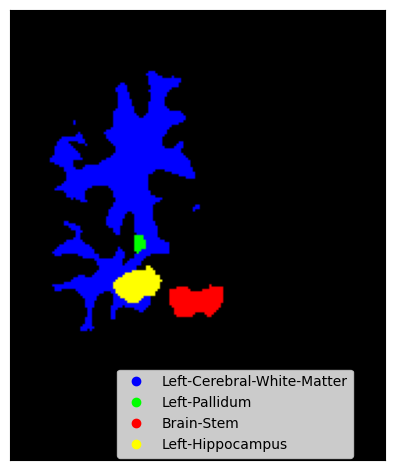

In [8]:
highlight_labels_in_img(img, label_ids_to_keep, colors, "chosen_labels.pdf")